In [2]:
import pandas as pd
import json
import json_flatten
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [77]:
bert_q = pd.read_csv("length_csv/berttrain_questions_dataframe.csv", index_col=None)
electra_q = pd.read_csv("length_csv/electratrain_questions_dataframe.csv", index_col=None)
bert_p = pd.read_csv("length_csv/berttrain_passages_dataframe.csv", index_col=None)
electra_p = pd.read_csv("length_csv/electratrain_passages_dataframe.csv", index_col=None)

In [78]:
print(len(bert_p))
print(electra_p['length'].quantile(q=0.99))
print(electra_p['length'].quantile(q=0.999))
print(electra_p['length'].quantile(q=0.9999))

8450944
188.0
244.0
364.0


In [79]:
bert_p.sort_values("length",ascending=False,inplace=True)
bert_p

,passage,length
2651718,Danial Hakimi performance in the leading role....,1606
1767233,Ganglioside a specific ganglioside can induce ...,1253
1176228,Nīlakaṇṭha Dhāraṇī mahā-lakuṭa-dharāya s...,1196
5945937,Yim Maukun today. Every drawing is a complete ...,1181
2931762,Carolina Estrada contributes to Australian cul...,1095
...,...,...
2943264,Otto cycle from 1 to 2 is The energy added to ...,106
1385810,Collegiate Water Polo Association Division B M...,106
424949,1943 Birthday Honours Force Royal Canadian Air...,105
4341293,Harriet Leve Director of a Play 2011 Outer Cri...,105


ELECTRA_question length info:              length
count  58880.000000
mean      11.808118
std        2.074326
min       10.000000
25%       10.000000
50%       11.000000
75%       13.000000
max       34.000000


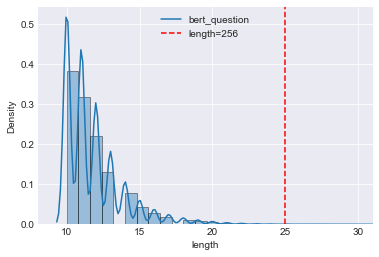

BERT_question length info:              length
count  58880.000000
mean      11.808118
std        2.074326
min       10.000000
25%       10.000000
50%       11.000000
75%       13.000000
max       34.000000


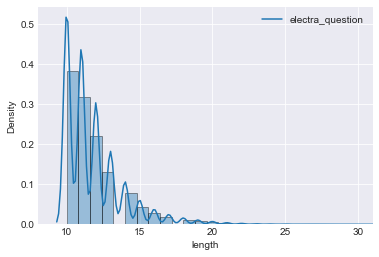

In [81]:
print("ELECTRA_question length info:", electra_q.describe())
sns.distplot(bert_q['length'], hist=True, norm_hist=False,
             bins=30, 
             hist_kws={'edgecolor':'black'},
             )
plt.axvline(x=25,c="r",ls="--")
plt.legend(labels=["bert_question","length=256" ])
plt.xlim((8,31))
plt.show()
print("BERT_question length info:", bert_q.describe())
sns.distplot(electra_q['length'], hist=True, norm_hist=False,
             bins=30,
             hist_kws={'edgecolor':'black'},
             )
plt.xlim((8,31))
plt.legend(labels=["electra_question" ])

BERT_passage length info              length
count  8.450944e+06
mean   1.391192e+02
std    1.528210e+01
min    1.050000e+02
25%    1.290000e+02
50%    1.370000e+02
75%    1.460000e+02
max    1.606000e+03


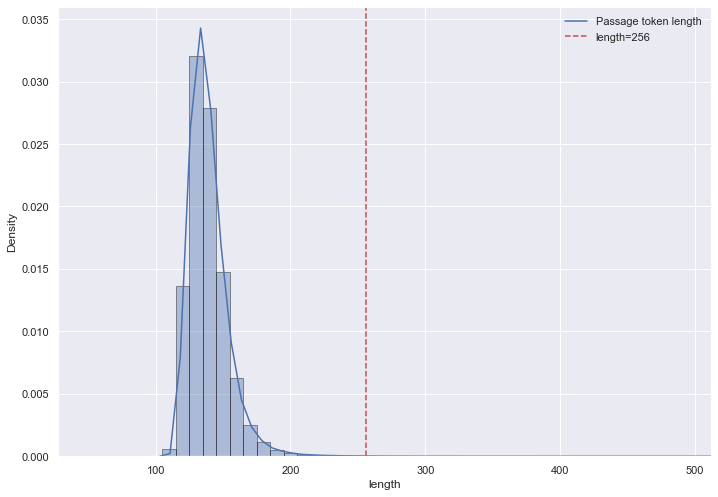

In [80]:
print("BERT_passage length info", bert_p.describe())
sns.distplot(bert_p['length'], hist=True, norm_hist=True,
             bins=int(150), 
             hist_kws={'edgecolor':'black'},
             )
plt.axvline(x=256,c="r",ls="--")
plt.legend(labels=["Passage token length" ,"length=256" ])
plt.xlim(right=512)
plt.savefig('passage_length.pdf')

In [81]:
eff= pd.read_csv("IR2_effeciency.csv")[1:]
eff

,Encoder,Embedding size,TTT,PEI,ITA,Inference time std dev (ms)
1,BERT,704,0.06,-0.01,0.09,0.10
2,BERT,640,-0.19,0.15,0.65,0.71
3,BERT,512,0.07,0.17,0.68,0.74
4,BERT,384,0.04,0.18,0.71,0.77
5,DistilBERT,1536,0.62,0.28,0.39,0.37
6,DistilBERT,768,0.61,0.08,-0.27,-0.38
7,DistilBERT,704,0.60,0.20,0.09,-0.02
8,DistilBERT,640,0.61,0.40,0.66,0.69
9,DistilBERT,512,0.61,0.23,0.00,-0.11
10,DistilBERT,384,0.61,0.27,0.15,0.09


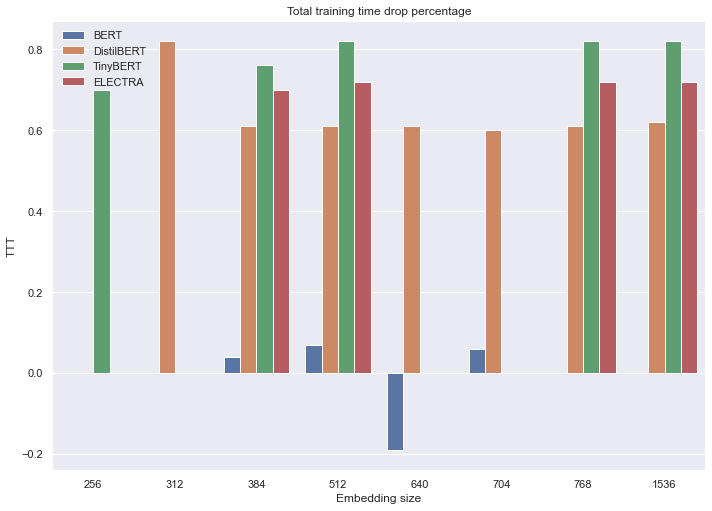

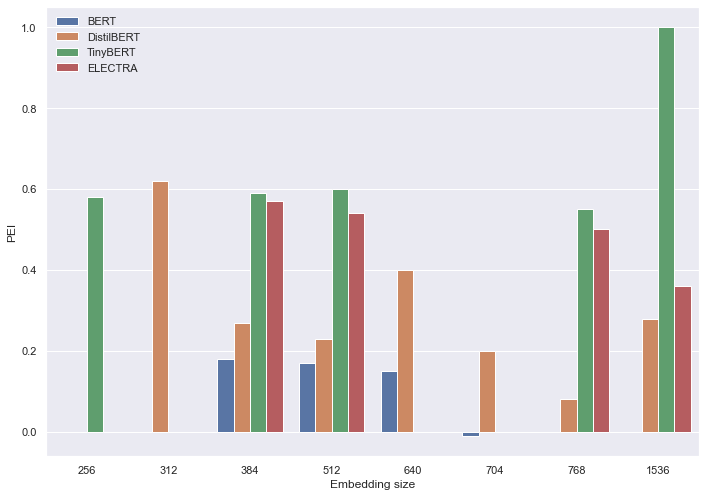

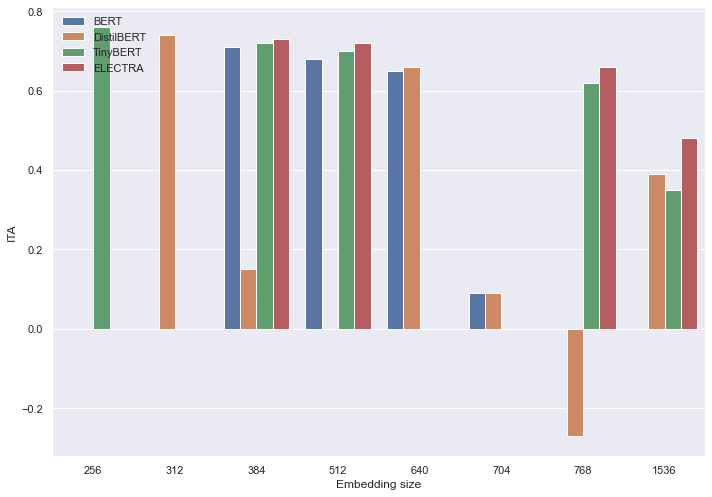

In [82]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax =sns.barplot(x="Embedding size", hue="Encoder", y ="TTT",data=eff,ci=None)
plt.legend(loc=2,ncol=1)
plt.savefig('TTT.pdf')
plt.title("Total training time drop percentage")
plt.show()

ax =sns.barplot(x="Embedding size", hue="Encoder", y ="PEI",data=eff,ci=None)
plt.legend(loc=2,ncol=1)
#plt.title("Passage encoding + indexing time time drop")
plt.savefig('PEI.pdf')
plt.show()

ax =sns.barplot(x="Embedding size", hue="Encoder", y ="ITA",data=eff,ci=None)
plt.legend(loc=2,ncol=1)
#plt.title("Inference time avg drop")
plt.savefig('ITA.pdf')
plt.show()
